# Logistic Regression
## Machine Learning Project

In this project, it will investigate a dataset containing census information from the 1994 census databse to create a logistic regression model that predicts if a person makes more than $50,000.

### Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,\
                            recall_score, f1_score, roc_curve, roc_auc_score

### Loading the data

In [2]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', \
             'marital-status', 'occupation', 'relationship', 'race', 'sex', \
             'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv('adult.data', header=None, names=col_names)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [32]:
# Clean columns by stripping extra whitespace for the columns of type 'object'.
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

### Logistic Regression Assumptions

Check whether the outcome variable is binary and balanced. The target variable `income` is binary. However, its classes are not balanced.

In [3]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

To build a logistic regression model, we need the data containing binary class. Select particular variables as the predictor variables and transform its data to dummy variables.

In [53]:
feature_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex', 'race', 'education']
X = pd.get_dummies(df[feature_cols], drop_first=True)
X.head()

,age,capital-gain,capital-loss,hours-per-week,sex_Male,race_Asian-Pac-Islander,race_Black,race_Other,race_White,education_11th,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,39,2174,0,40,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,50,0,0,13,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,38,0,0,40,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,53,0,0,40,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,28,0,0,40,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Create a heatmap to confirm whether there is multicollinearity. The heatmap shows that there is no high correlation between any pair of features.

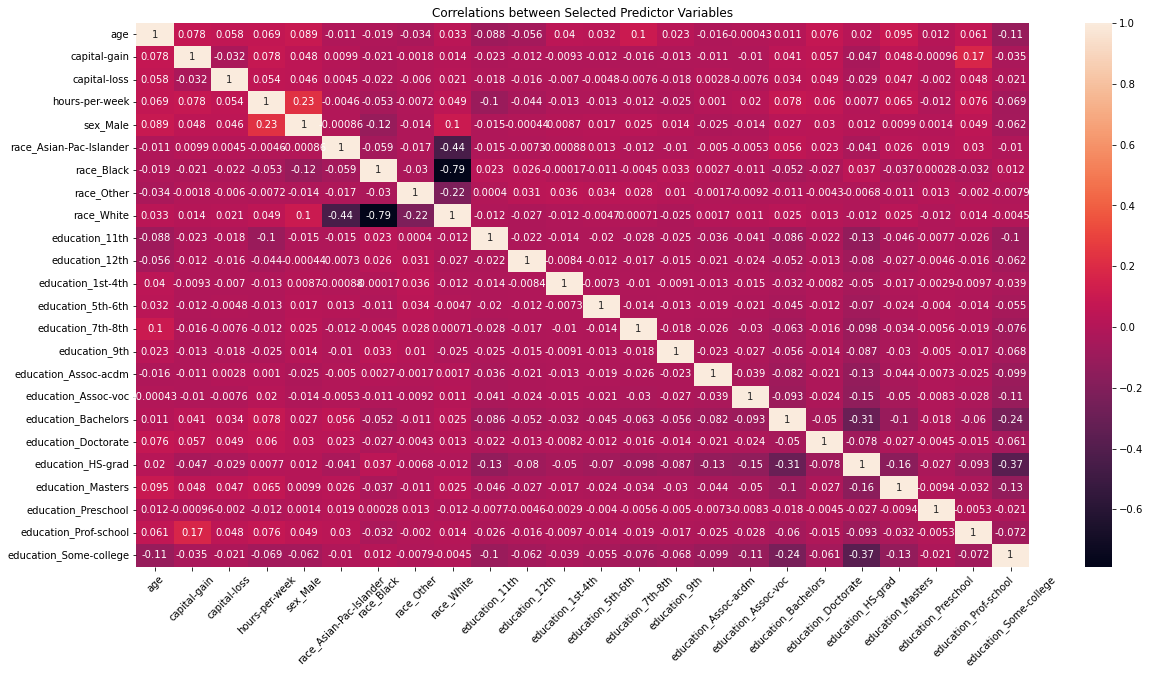

In [57]:
plt.figure(figsize=(20,10))
seaborn.heatmap(X.corr(), annot=True)
plt.xticks(rotation=45)
plt.title('Correlations between Selected Predictor Variables')
plt.show()
plt.close()

Since all the features are converted into dummy variables (0 or 1), scaling is not required for building logistic regression model. Now, create a binary outcome variable containing 0 when income is less than \\$50K, 1 when greater than \\$50K.

In [33]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [39]:
y = pd.DataFrame(df['income'].apply(lambda x: 0 if x=='<=50K' else 1))
y.head(10)

,income
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,1


### Logictic Regression Models and Evaluation

Split the data into a training and testing set. Then, use the model to make predictions.

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [63]:
log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

/Users/jayley/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [64]:
print('Model Parameters, Intercepts: \n', log_reg.intercept_)
print('Model Parameters, Coefficients: \n', log_reg.coef_)

Model Parameters, Intercepts: 
 [-5.59160096]
Model Parameters, Coefficients: 
 [[ 3.66338422e-02  3.14832918e-04  6.66466977e-04  3.20380103e-02
   1.03358890e+00  0.00000000e+00 -3.46322914e-01  0.00000000e+00
   8.94213170e-02 -5.74899498e-01  0.00000000e+00  0.00000000e+00
  -3.99679684e-01 -8.92875379e-01 -4.99192109e-01  5.75283652e-01
   5.49077124e-01  1.28382763e+00  1.80176510e+00  0.00000000e+00
   1.60082011e+00  0.00000000e+00  1.82429159e+00  3.86592209e-01]]


Evaluate the predictions of the model on the test set using the confusion matrix and accuracy score.

In [65]:
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Accuracy Score: \n', accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[4775  251]
 [ 879  608]]
Accuracy Score: 
 0.8265008444649163


Create a dataframe with the model coefficients and variable names. Sort the values according to the coefficients and exclude zeros.

In [68]:
cm = pd.DataFrame(zip(X.columns, log_reg.coef_[0]), columns=['variable', 'coef'])
cm = cm[cm['coef'] != 0].sort_values('coef')
cm

,variable,coef
13,education_7th-8th,-0.892875
9,education_11th,-0.574899
14,education_9th,-0.499192
12,education_5th-6th,-0.399680
6,race_Black,-0.346323
1,capital-gain,0.000315
2,capital-loss,0.000666
3,hours-per-week,0.032038
0,age,0.036634
8,race_White,0.089421


Create a barplot of the coefficients.

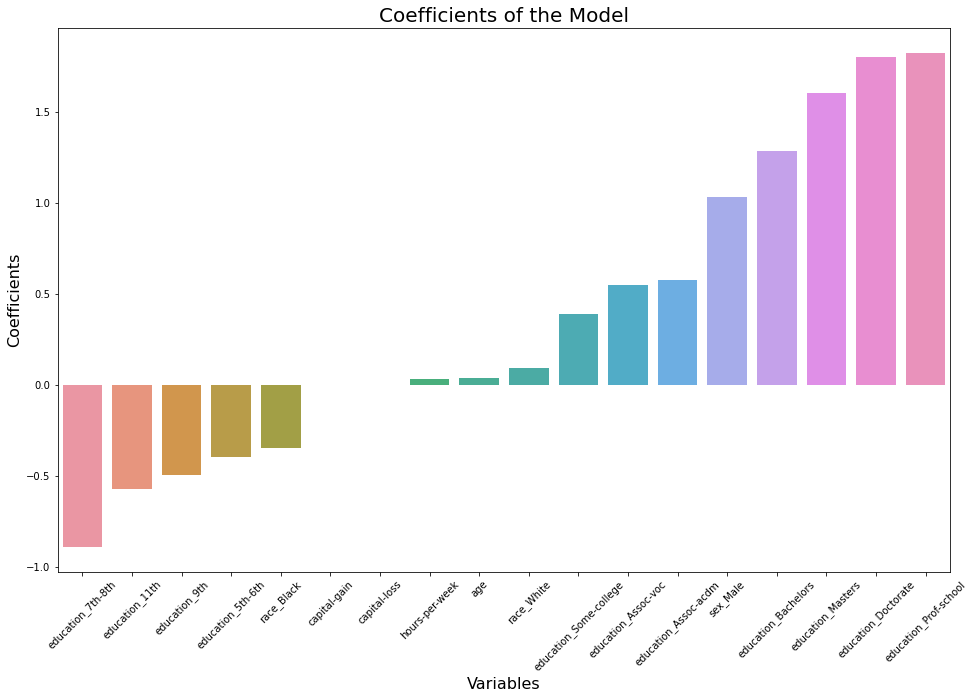

In [85]:
plt.figure(figsize=(16,10))
seaborn.barplot(data=cm, x='variable', y='coef')
plt.xlabel('Variables', fontsize=16)
plt.ylabel('Coefficients', fontsize=16)
plt.xticks(rotation=45)
plt.title('Coefficients of the Model', fontsize=20)
plt.show()

Plot the ROC curve and find the AUC value.

The AUC score is 0.8457.


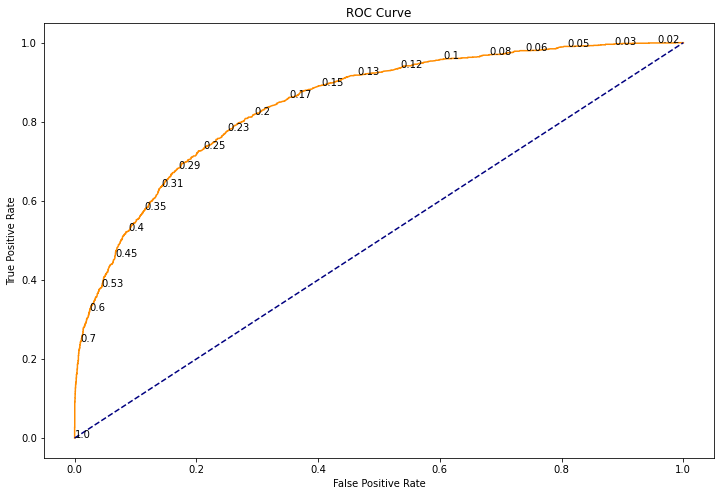

In [105]:
y_pred_prob = log_reg.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
print('The AUC score is {}.'.format(roc_auc.round(4)))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

plt.clf
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, color='darkorange', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot([0,1],[0,1], color='navy', linestyle='--')

idx = list(range(len(thresholds)))[1::100]
for i in idx:
    plt.text(fpr[i], tpr[i], thresholds[i].round(2))
    
plt.show()
